# Visão Computacional com PyTorch

* E-book de referência: https://www.learnpytorch.io/03_pytorch_computer_vision/

# 0. Bibliotecas de Visão Computacional em PyTorch

* `torchvision` - Biblioteca base para Visão computacional no PyTorch
* `torchvision.datasets` - Consegue funções de carregamento de datasets
* `torchvision.models` - Consegue modelos pré treinados que podemos utilizar
* `torchvision.transforms` - Funções para manipular os dados para poderem ser usados em um modelo
* `torch.utils.data.Dataset` - Classe de datasets base
* `torch.utils.data.DataLoader` - Cria um iterador Python sobre um dataset

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu116
0.14.1+cu116


# 1. Conseguindo um dataset

O dataset que usaremos é o FashionMNIST disponível em torchvision.datasets. É um dataset composto por imagens de tipos de roupas em escala de tons de cinza. 

In [2]:
# Definindo dados de treino
train_data = datasets.FashionMNIST(
    root="data", # Para onde fazer o download dos dados
    train=True, # Se é para baixar os dados de treino
    download=True, # Se queremos realizar o download
    transform=ToTensor(), # Como transformar os dados
    target_transform=None # Como transformar os labels/targets
)

test_data = datasets.FashionMNIST(
    root="data", # Para onde fazer o download dos dados
    train=False, # Se é para baixar os dados de treino também
    download=True, # Se queremos realizar o download
    transform=ToTensor(), # Como transformar os dados
    target_transform=None # Como transformar os labels/targets
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# Vendo o primeiro exemplo de treino
image, label = train_data[0]

# A função ToTensor normaliza todos os valores para entre 0 e 1, inclusive os RGB
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
print(f"Shape da imagem: {image.shape} ->  [color_channels, height, width]")
print(f"Image labels: {class_names[label]}")

Shape da imagem: torch.Size([1, 28, 28]) ->  [color_channels, height, width]
Image labels: Ankle boot


### 1.2 Visualizando os dados

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

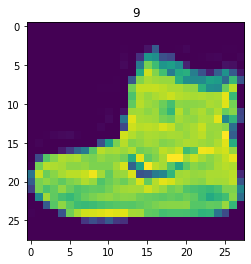

In [9]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

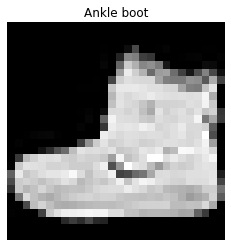

In [10]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False);

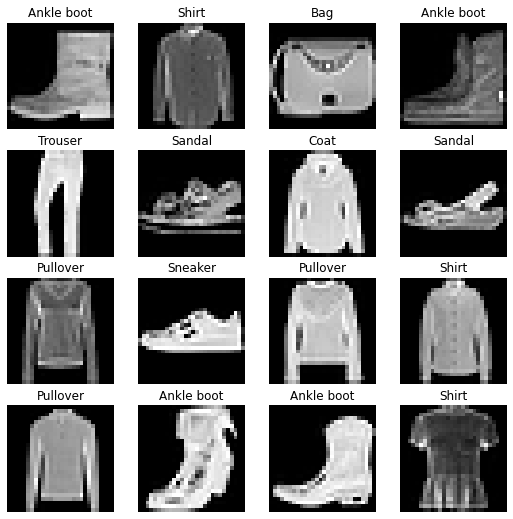

In [11]:
# Plota mais imagens
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)


# 2. Preparando DataLoader

Atualmente, nosso dado está na forma de Datasets PyTorch. O DataLoader torna o dataset em um iterável Python.

Mais especificamente, queremos tornar os nossos dados em batches (ou mini-batches). Queremos fazer isso por que:

1. É mais eficiente computacionalmente já que o hardware disponível pode não ser capaz de guardar em memória 60000 imagens de uma vez. Assim, quebramos o dataset em grupos (batches) menores de 32 imagens.
2. Ele dá a nossa rede neural mais chances de atualizar os seus gradientes por época. ([Mini-batch Gradient Descent](https://youtu.be/l4lSUAcvHFs)).

In [12]:
from torch.utils.data import DataLoader

# Define o hiperparâmetro de tamanho dos batches
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f201f8edb50>,
 <torch.utils.data.dataloader.DataLoader at 0x7f201f8ed940>)

In [13]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Tamanho do train_dataloader: {len(train_dataloader)} batches de {BATCH_SIZE}...")
print(f"Tamanho do test_dataloader: {len(test_dataloader)} batches de {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f201f8edb50>, <torch.utils.data.dataloader.DataLoader object at 0x7f201f8ed940>)
Tamanho do train_dataloader: 1875 batches de 32...
Tamanho do test_dataloader: 313 batches de 32...


In [14]:
# O que está dentro do dataloader de treino
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


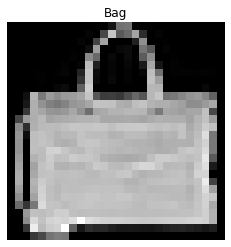

In [15]:
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# 3. Model 0: Construindo um modelo de baseline

Ao começar a criar vários experimentos de modelagem de machine learning, é uma boa prática começar com um modelo de baseline.

Um modelo de baseline é um modelo simples que queremos melhorar com experimentos/modelos subsequentes.

Em outras palavras, começe simples e adicione complexidade quando necessário.

In [16]:
# Criando uma flatten layer que tranforma um tensor de n dimensões
# em um tensor com 2 dimensões (um vetor)
flatten_model = nn.Flatten()

# Uma amostra
x = train_features_batch[0]

# "Amassando" a amostra
output = flatten_model(x) # Realiza uma forward pass

print(f"Shape antes do flatten: {x.shape} -> [color_channels, height, width]")
print(f"Shape depois do flatten: {output.shape} -> [color_channels, height * width]")

Shape antes do flatten: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape depois do flatten: torch.Size([1, 784]) -> [color_channels, height * width]


In [17]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [18]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784, # isso é 28 * 28
    hidden_units=10, # Quantas unidades na camada oculta
    output_shape=len(class_names) # um para cada classe
).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
# Forward pass apenas de teste
dummy_x = torch.rand([1, 1, 28, 28])
model_0.eval()
with torch.inference_mode():
  print(model_0(dummy_x))

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]])


In [20]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Configurando loss, otimizador e métricas de avaliação

* Loss function - Já que estamos trabalhando com dados multi-classe, nossa função loss será `nn.CrossEntropyLoss()`
* Otimizador - O otimizador será `torch.optim.SGD()`
* Métrica de avaliação - Já que estamos trabalhando com um problema de classificação, usaremos a acurácia



In [21]:
import requests
from pathlib import Path

# Download funções de ajuda de um repo
if Path("helper_functions.py").is_file():
  print(f"helper_functions.py já existe...")
else:
  print("Baixando helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", 'wb') as f:
    f.write(request.content)

Baixando helper_functions.py


In [22]:
# Importando métrica de acurácia
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Criando uma função para medir o tempo dos experimentos

Machine Learning é muito experimental. Duas das principais coisas que queremos monitorar são:
1. A performance do modelo (loss e acurácia)
2. Quão rápido ele executa

In [23]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """
  Printa a diferença entre o tempo de início e fim.
  """
  total_time = end - start
  print(f"Tempo de treino em {device}: {total_time:.3f} segundos")
  return total_time

In [24]:
start_time = timer()
# ...
end_time = timer()
print_train_time(start_time, end_time, "cpu")

Tempo de treino em cpu: 0.000 segundos


3.362199999656923e-05

### 3.3 Criando um loop de treino e treinando o modelo em batches de dados

1. Loop pelas épocas
2. Loop pelos batches de treino, realizando passos de treino, calculando o losss *por batch*.
3. Loop pelos batches de teste, realizando passos de teste, calculando a loss de teste
4. Printar coisas
5. Medir o tempo de tudo

In [25]:
# Importando tqdm para uma barra de progresso
from tqdm.auto import tqdm

torch.manual_seed(42)

# Deixaremos baixo para ir mais rápido
epochs = 3

train_time_start_on_cpu = timer()

# É assim que o tqdm funciona
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n======")

  # Treino
  # Acumulamos a loss por batch para depois conseguir a loss média
  # e essa será a loss da época
  train_loss = 0

  # Loop pelos batches
  # X = image; label = y
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    
    y_pred = model_0(X)
    
    # Loss do batch
    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    # Estamos realizando a atualização dos gradientes por BATCH
    # e não por época
    optimizer.step()

    if batch % 400 == 0:
      print(f"Olhamos em {batch * len(X)}/{len(train_dataloader.dataset)} amostras.")
  
  # Média do loss
  train_loss /= len(train_dataloader)

  ### Teste
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)

      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))
    
    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)
  
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(train_time_start_on_cpu,
                                            train_time_end_on_cpu,
                                            str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Olhamos em 0/60000 amostras.
Olhamos em 12800/60000 amostras.
Olhamos em 25600/60000 amostras.
Olhamos em 38400/60000 amostras.
Olhamos em 51200/60000 amostras.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
Olhamos em 0/60000 amostras.
Olhamos em 12800/60000 amostras.
Olhamos em 25600/60000 amostras.
Olhamos em 38400/60000 amostras.
Olhamos em 51200/60000 amostras.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
Olhamos em 0/60000 amostras.
Olhamos em 12800/60000 amostras.
Olhamos em 25600/60000 amostras.
Olhamos em 38400/60000 amostras.
Olhamos em 51200/60000 amostras.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Tempo de treino em cpu: 32.973 segundos


# 4. Configurando código agnóstico a device

In [26]:
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cuda'

# 5. Realizando predições e conseguindo os resultados desse modelo 0

In [27]:
torch.manual_seed(42)
def eval_mode(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: device):
  """
  Retorna um dicionário ccontendo os resultados do modelo ao predizer
  em um data_loader.
  """

  loss, acc = 0, 0
  model_on_device = model.to(device)
  model_on_device.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):

      X, y = X.to(device), y.to(device)
      y_pred = model_on_device(X)
    
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name': model_on_device.__class__.__name__, # só funciona quando o modelo foi criado com uma classe
          "model_loss": loss.item(),
          "model_acc": acc}

model_0_results = eval_mode(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# 6. Model 1: Construindo um modelo melhor com não-linearidade

Nós aprendemos sobre o poder da não-linearidade no notebook 02.



In [28]:
# Criando um modelo com camadas lineares e não-lineares
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # Transforma o input em um vetor
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )
  
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [29]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                         hidden_units=10,
                         output_shape=len(class_names)).to(device) # Manda para a GPU se possível
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Configurar loss, otimizador e métricas de avaliação

In [30]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 Criando funções de loops de treino e teste

Vamos criar funções para:
* loop de treino - `train_step()`
* loop de teste - `test_step()`

In [31]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """
  Realiza passo de treino em um modelo tentando aprender em um data_loader
  """

  # Treino
  # Acumulamos a loss e acc por batch para depois conseguir 
  # a loss e acc média e essa será a loss da época
  train_loss, train_acc = 0, 0

  model.train()

  # Loop pelos batches
  # X = image; label = y
  for batch, (X, y) in enumerate(data_loader):

    X, y = X.to(device), y.to(device)

    y_pred = model(X)
    
    # Loss do batch
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # logits -> probs

    optimizer.zero_grad()

    loss.backward()

    # Estamos realizando a atualização dos gradientes por BATCH
    # e não por época
    optimizer.step()
  
  # Média do loss
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [32]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """
  Realiza um passo de loop de teste em um modelo passando por um data_loader
  """

  test_loss, test_acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    #Isso deve estar dentro do context manager
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [33]:
# Importando tqdm para uma barra de progresso
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)

# Deixaremos baixo para ir mais rápido
epochs = 3

train_time_start_on_gpu = timer()

# É assim que o tqdm funciona
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n======")

  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  
  test_step(model=model_1,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu,
                                            train_time_end_on_gpu,
                                            device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%
Epoch: 1
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%
Epoch: 2
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%
Tempo de treino em cuda: 26.767 segundos


In [34]:
model_1_results = eval_mode(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [35]:
total_train_time_model_1

26.767253931

In [36]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [37]:
total_train_time_model_0

32.972740021

Apesar de o modelo 1 ser levemente mais rápido do que o modelo 0 por estar na GPU, sua performance foi pior do que a do modelo 0.

Recurso: https://horace.io/brrr_intro.html

# 7. Modelo 2: Construindo uma Rede Neural Convolucional (CNN)

CNN's também são conhecidas como ConvNets e são capazes de encontrar padrões em dados visuais.

Recurso: https://poloclub.github.io/cnn-explainer/


In [38]:
# Criando uma rede neural convolucional
class FashionMNISTModelV2(nn.Module):
  """
  Arquitetura de modelo que replica o modelo TinyVGG
  a partir do site CNN explainer
  """
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    # Um bloco pode ser composto de uma camada
    # convolucional, não-linear e de pooling
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, 
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)    
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # Existe um truque para calcular isso
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Shape de saída conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Shape de saída conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"Shape de saída classifier {x.shape}")
    return x


In [39]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [40]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [41]:
model_2.eval()
with torch.inference_mode():
  print(model_2(rand_image_tensor.unsqueeze(0).to(device)))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0')


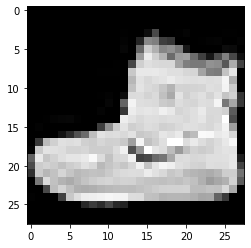

In [42]:
plt.imshow(image.squeeze(), cmap='gray')

### 7.1 Passando pelo `nn.Conv2d()`

Veja a documentação https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [43]:
torch.manual_seed(42)

# Criando um batch de imagens
images = torch.randn(size=(32, 3 ,64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n: {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [44]:
torch.manual_seed(42)
# Criando uma única camada conv2d
conv_layer = nn.Conv2d(in_channels=3, 
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
conv_layer.weight

Parameter containing:
tensor([[[[ 0.1471,  0.1597, -0.0451],
          [ 0.1768, -0.0422,  0.0388],
          [-0.0937,  0.1130,  0.1697]],

         [[-0.1412,  0.1673,  0.0360],
          [ 0.1422,  0.0261,  0.0928],
          [-0.0272,  0.1484,  0.0284]],

         [[-0.0898,  0.0491, -0.0887],
          [-0.0226, -0.0782,  0.1277],
          [-0.1519, -0.0887, -0.0543]]],


        [[[-0.1157,  0.0182, -0.1901],
          [ 0.1738, -0.1635,  0.1486],
          [ 0.0320, -0.0625,  0.1189]],

         [[ 0.0300,  0.1555,  0.0210],
          [-0.0607,  0.0517, -0.0522],
          [ 0.0810,  0.1718,  0.1112]],

         [[-0.0841,  0.1111,  0.0344],
          [ 0.0977, -0.1173, -0.1905],
          [-0.0744, -0.1476,  0.1579]]],


        [[[ 0.0554,  0.0797,  0.0609],
          [-0.0033,  0.1506, -0.1367],
          [ 0.0121, -0.1314,  0.0593]],

         [[-0.0663,  0.0590, -0.0401],
          [ 0.1596, -0.1141, -0.1148],
          [-0.1148,  0.1731,  0.0641]],

         [[ 0.1852, -0

A camada convolucional foi instanciada com 10 filtros diferentes de forma aleatória.

In [45]:
# Passando os dados pela camada convolucional
conv_output = conv_layer(test_image)
conv_output

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [46]:
test_image.shape, conv_output.shape

(torch.Size([3, 64, 64]), torch.Size([10, 62, 62]))

In [47]:
(conv_output[0] == conv_output[1])

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

A camada de convolução aplica *k* kernels de tamanho (*m*, *n*) sequencialmente pela imagem. A convolução serve para agregar informação espacial em um número. Dependendo do tamanho do kernel aplicado, definimos quanta informação deve ser agregada.

### 7.2 Passando pela camada `nn.MaxPool2d()`

Veja a documentação: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html


In [48]:
# Criando uma camada de exemplo
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Passando os dados pela convolução
test_image_through_conv = conv_layer(test_image)
print(f"Shape depois de conv: {test_image_through_conv.shape}")

# Passando pela camada de pooling
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape depois do max pooling: {test_image_through_conv_and_max_pool.shape}")

Shape depois de conv: torch.Size([10, 62, 62])
Shape depois do max pooling: torch.Size([10, 31, 31])


In [49]:
torch.manual_seed(42)
# Criando um tensor aleatório com uma quantidade similar de dimensões
random_tensor = torch.randn(size=(1, 1, 2 ,2))
print(f"\nRandom tensor tensor:\n {random_tensor}")
print(f"Random tensor shape:\n {random_tensor.shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape:\n {max_pool_tensor.shape}")


Random tensor tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape:
 torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape:
 torch.Size([1, 1, 1, 1])


A camada de pooling, no caso, max pooling, reduz o tamanho das dimensões de sua entrada ao agregar *n* elementos de acordo com o tamanho do *kernel* em um só. Isso pode se entendido como uma abstração e, consequentemente, generalização ocorrendo.

### 7.3 Configurando loss function e otimizador para o `model_2`

In [50]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### 7.4 Treino e teste no `model_2`

In [51]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(
      model=model_2,
      loss_fn=loss_fn,
      data_loader=train_dataloader,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device=device
  )
  test_step(
      model=model_2,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
  )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(train_time_start_model_2,
                                            train_time_end_model_2,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.59831 | Train acc: 78.35%
Test loss: 0.39363 | Test acc: 85.72%
Epoch: 1
------
Train loss: 0.36181 | Train acc: 87.01%
Test loss: 0.34948 | Test acc: 86.93%
Epoch: 2
------
Train loss: 0.32319 | Train acc: 88.36%
Test loss: 0.31886 | Test acc: 88.50%
Tempo de treino em cuda: 36.793 segundos


In [52]:
!nvidia-smi

Wed Feb  8 22:31:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    26W /  70W |   1134MiB / 15360MiB |     11%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [53]:
# Pega os resultados do model_2
model_2_results = eval_mode(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3188580870628357,
 'model_acc': 88.49840255591054}

# 8. Comparando os resultados dos modelos e o tempo de treino

In [54]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.318858,88.498403


O novo modelo que segue a arquitetura do TinyVGG é o melhor modelo que conseguimos. Além disso, como só o treinamos por 3 épocas, a sua performance poderia ter sido melhor ainda.

In [55]:
# Adicionando os tempos de treino às comparações
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,32.972740
1,FashionMNISTModelV1,0.685001,75.019968,26.767254
2,FashionMNISTModelV2,0.318858,88.498403,36.792539


O melhor modelo não foi o que mais demorou para treinar.

Text(0, 0.5, 'model')

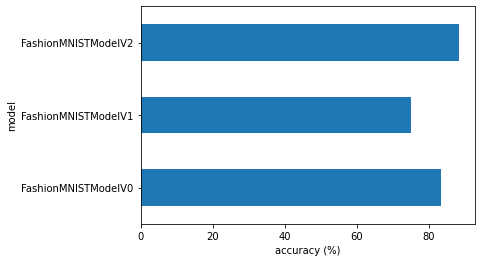

In [56]:
# Visualizando os nossos resultados
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel("accuracy (%)")
plt.ylabel("model")

# 9. Realizando predições aleatórias com o melhor modelo

In [57]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # O modelo tem logits como output
      pred_logit = model(sample)

      # logit para probabilidade
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())

  # Concatena tudo na lista em um único tensor
  return torch.stack(pred_probs)

In [58]:
import random 
random.seed(42)
test_samples = []
test_labels = []
NUM_SAMPLES = 9
for sample, label in random.sample(list(test_data), k=NUM_SAMPLES):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

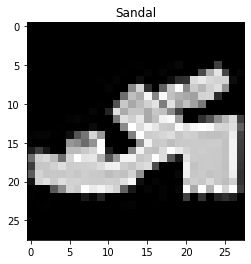

In [59]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [60]:
# Realizando as predições
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# Vendo as duas primeiras probabilidades das predições
pred_probs[:2]

tensor([[2.7168e-08, 1.7295e-08, 1.5786e-08, 4.7596e-08, 7.2522e-09, 9.9996e-01,
         2.0443e-07, 3.3350e-06, 1.4173e-05, 2.6358e-05],
        [5.9818e-02, 5.2372e-01, 1.4889e-03, 1.4259e-01, 3.3225e-02, 8.5186e-05,
         2.3705e-01, 5.5152e-04, 4.1935e-04, 1.0606e-03]])

In [61]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [62]:
# Convertendo probabilidades em labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

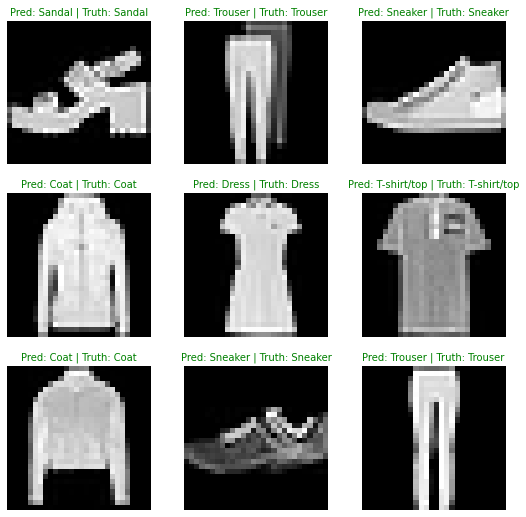

In [63]:
# Plotando as predições
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Um subplot para cada amostra
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap='gray')
  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')
  
  plt.axis(False)

# 10. Criando uma matriz de confusão para mais avaliação

1. Realizar predições com o modelo no dataset de teste
2. Criar uma matriz de confusão `torchmetrics.ConfusionMatrix`
3. Plotar a matriz de confusão usando `mlxtend.plotting.plot_confusion_matrix()`: http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [64]:
from tqdm.auto import tqdm


y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Realizando predições...."):
    X, y = X.to(device), y.to(device)
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.to('cpu') )

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Realizando predições....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [65]:
len(y_pred_tensor)

10000

In [67]:
# Vê se os pacotes necessários estão instalados, se não, instala eles
try:
  import torchmetrics, mlxtend
  ml_version = mlxtend.__version__
  print(f"mlxtend version: {ml_version}")
  assert int(ml_version.split(".")[1]) >= 19, "mlxtend version deve ser 0.19.0 ou maior"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.7 MB/s eta 0:00:00
mlxtend version: 0.21.0


In [69]:
import mlxtend
print(mlxtend.__version__)

0.21.0


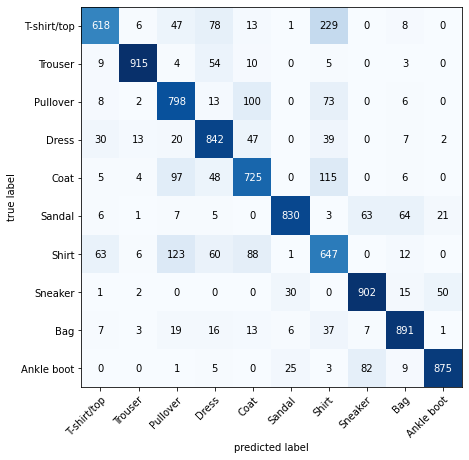

In [73]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Configurando instância da matrix de confusão
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, 
                         target=test_data.targets)

# 3. Plotando a matrix de confusão
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

# 11. Salvando e Carregando o melhor modelo

In [78]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Salvando modelo em: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Salvando modelo em: models/03_pytorch_computer_vision_model_2.pth


In [79]:
# Criando uma nova instância
torch.manual_seed(42)

image_shape = [1, 28, 28]
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                  hidden_units=10,
                                  output_shape=len(class_names)
                                )

# Carregando o modelo
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [80]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3188580870628357,
 'model_acc': 88.49840255591054}

In [83]:
# Avaliando o modelo carregado
torch.manual_seed(42)

loaded_model_2_results = eval_mode(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

  0%|          | 0/313 [00:00<?, ?it/s]

In [85]:
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3188580870628357,
 'model_acc': 88.49840255591054}

In [86]:
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']))

tensor(True)